In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
#from pyAgrum.lib.pretty_print import pretty_cpt

from IPython.display import display, Math, Latex

%load_ext autoreload
%autoreload 2

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gnb.forDarkTheme()

In [2]:
bn=gum.fastBN("A[1,4]->S[2,8]<-B[1,4]->M[1,4]<-A;M->P[0,1]")
bn.cpt("A").fillWith(1).normalize() # Dé A
bn.cpt("B").fillWith(1).normalize() # Dé B
bn.cpt("S").fillWithFunction("A+B") # S = somme des 2 dés
bn.cpt("M").fillWithFunction("max(A,B)") # M= Max des 2 dés
bn.cpt("P").fillWithFunction("M % 2") # P = parité du max
gnb.sideBySide(bn,gnb.getInference(bn),gnb.getInference(bn,evs={"P":1}),
              captions=["Le réseau bayésien","inférence sans observation","inférence avec observation : $P=1$"])

InvalidArgument: [pyAgrum] Invalid argument: Only one value for variable A (2 at least are needed).

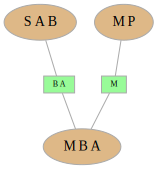

In [3]:
gnb.showJunctionTree(bn)

In [4]:
# CREATION DES PSI_0 des cliques et des psi_0 des séparateurs
PSI_0_SAB=bn.cpt("S")*bn.cpt("A")
psi_0_BA=gum.Potential().add(bn.variable("A")).add(bn.variable("B")).fillWith(1)
PSI_0_MBA=bn.cpt("M")*bn.cpt("B")
psi_0_M=gum.Potential().add(bn.variable("M")).fillWith(1)
PSI_0_MP=bn.cpt("P")
gnb.sideBySide(gnb.getJunctionTree(bn),PSI_0_SAB,psi_0_BA,PSI_0_MBA,psi_0_M,PSI_0_MP,
              captions=["JT","$\Psi^0_{SAB}$","$\Psi^0_{BA}$","$\Psi^0_{MBA}$","$\Psi^0_{M}$","$\Psi^0_{MP}$"])

In [5]:
# messages : SAB--[BA]-->MBA--[M]-->MP
PSI_1_SAB=PSI_0_SAB
#MESSAGE de SAB->MBA
psi_1_BA=PSI_1_SAB.margSumIn(["A","B"])
PSI_1_MBA=PSI_0_MBA*psi_1_BA/psi_0_BA
#message de MBA->MP
psi_1_M=PSI_1_MBA.margSumIn("M")
PSI_1_MP=PSI_0_MP*psi_1_M/psi_0_M

In [6]:
gnb.sideBySide(gnb.getJunctionTree(bn),PSI_1_SAB,psi_1_BA,PSI_1_MBA,psi_1_M,PSI_1_MP,
              captions=["JT","$\Psi^1_{SAB}$","$\Psi^1_{BA}$","$\Psi^1_{MBA}$","$\Psi^1_{M}$","$\Psi^1_{MP}$"])

In [7]:
# messages : MP--[M]-->MBA--[BA]-->SAB
PSI_2_MP=PSI_1_MP
# message de MP->MBA
psi_2_M=PSI_2_MP.margSumIn("M")
PSI_2_MBA=PSI_1_MBA*psi_2_M/psi_1_M
# message de MBA->SAB
psi_2_BA=PSI_2_MBA.margSumIn(["A","B"])
PSI_2_SAB=PSI_1_SAB*psi_2_BA/psi_1_BA
gnb.sideBySide(gnb.getJunctionTree(bn),PSI_2_SAB,psi_2_BA,PSI_2_MBA,psi_2_M,PSI_2_MP,
              captions=["JT","$\Psi^2_{SAB}$","$\Psi^2_{BA}$","$\Psi^2_{MBA}$","$\Psi^2_{M}$","$\Psi^2_{MP}$"])

In [8]:
# l'inférence est bien exacte :
gnb.sideBySide(gnb.getInference(bn),psi_2_M,psi_2_BA.margSumIn("A"),psi_2_BA.margSumIn("B"),PSI_2_SAB.margSumIn("S"),PSI_2_MP.margSumIn("P"))

In [9]:
# ON RAJOUTE L'EVIDENCE ET ON RECOMMENCE LES CALCULS
ev=gum.Potential().add(bn.variable("P")).fillWith([0,1])

In [10]:
# CREATION DES PSI_0 des cliques et des psi_0 des séparateurs
PSI_0_SAB=bn.cpt("S")*bn.cpt("A")
psi_0_BA=gum.Potential().add(bn.variable("A")).add(bn.variable("B")).fillWith(1)
PSI_0_MBA=bn.cpt("M")*bn.cpt("B")
psi_0_M=gum.Potential().add(bn.variable("M")).fillWith(1)
PSI_0_MP=bn.cpt("P")*ev # ON RAJOUTE L'EVIDEENCE ICI (dans le potential de la clique MP)

# messages : SAB--[BA]-->MBA--[M]-->MP
PSI_1_SAB=PSI_0_SAB
#MESSAGE de SAB->MBA
psi_1_BA=PSI_1_SAB.margSumIn(["A","B"])
PSI_1_MBA=PSI_0_MBA*psi_1_BA/psi_0_BA
#message de MBA->MP
psi_1_M=PSI_1_MBA.margSumIn("M")
PSI_1_MP=PSI_0_MP*psi_1_M/psi_0_M

# messages : MP--[M]-->MBA--[BA]-->SAB
PSI_2_MP=PSI_1_MP
# message de MP->MBA
psi_2_M=PSI_2_MP.margSumIn("M")
PSI_2_MBA=PSI_1_MBA*psi_2_M/psi_1_M
# message de MBA->SAB
psi_2_BA=PSI_2_MBA.margSumIn(["A","B"])
PSI_2_SAB=PSI_1_SAB*psi_2_BA/psi_1_BA

In [11]:
# l'inférence est bien exacte :
gnb.sideBySide(gnb.getInference(bn,evs={"P":1}),psi_2_M,psi_2_BA.margSumIn("A"),psi_2_BA.margSumIn("B"),PSI_2_SAB.margSumIn("S"),PSI_2_MP.margSumIn("P"))

In [12]:
# ON A OUBLIE DE NORMALISER !!! :-)
# l'inférence est bien exacte :
gnb.sideBySide(gnb.getInference(bn,evs={"P":1}),psi_2_M.normalize(),psi_2_BA.normalize().margSumIn("A"),psi_2_BA.normalize().margSumIn("B"),PSI_2_SAB.normalize().margSumIn("S"),PSI_2_MP.normalize().margSumIn("P"))